Cas 1 : alpha=0 et beta=0 (sans frottement) --> Portée = 40.91 m
Cas 2 : alpha=0 et beta=0.05 (frottement quadratique seul) --> Portée = 17.57 m
Cas 3 : alpha=0.1 et beta=0 (frottement linéaire seul) --> Portée = 34.14 m


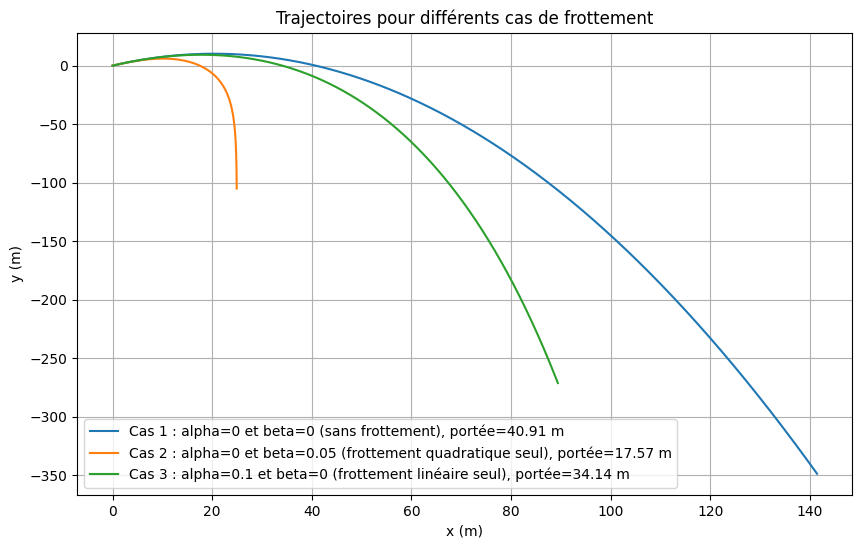

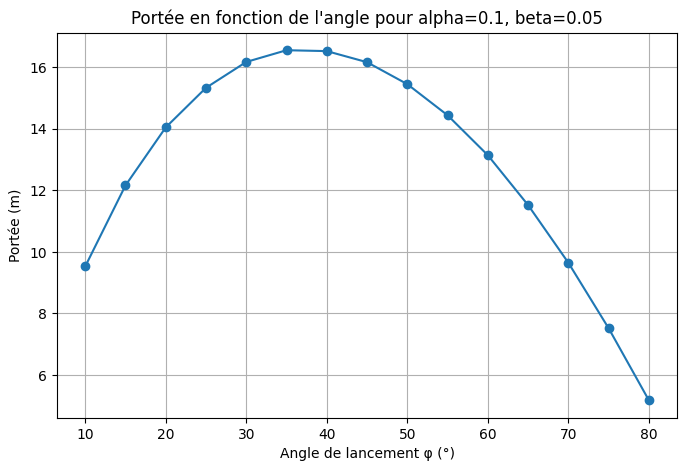

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp #Solveur de ED
# Paramètres généraux
m = 1.0       # masse [kg]
g = 9.8042      # gravité [m/s²] ( J'ai considöré la valeur de g à la ville de Fribourg
v0 = 20.0     # vitesse initiale [m/s]
t0, tf = 0, 10
t_eval = np.linspace(t0, tf, 1000) #Voir_chapitre3_Moodle
# Fonction représentant le mouvement

def equations(t, y, m, g, alpha, beta):
    x, y_pos, vx, vy = y
    v = np.sqrt(vx**2 + vy**2)  # vitesse totale
    ax = - alpha * vx - beta * vx * v / m # accélération selon x
    ay = - g - alpha * vy - beta * vy * v / m # accélération selon y ( Vous trouverez dans mon pdf l'explication mathématique)
    return [vx, vy, ax, ay] # retourne la dérivée du vecteur d'ét

# Q1. Résolution numérique pour les différents cas:

cases = [
    {"alpha":0.0, "beta":0.0, "message":"Cas 1 : alpha=0 et beta=0 (sans frottement)"},
    {"alpha":0.0, "beta":0.05, "message":"Cas 2 : alpha=0 et beta=0.05 (frottement quadratique seul)"},
    {"alpha":0.1, "beta":0.0, "message":"Cas 3 : alpha=0.1 et beta=0 (frottement linéaire seul)"}
]

plt.figure(figsize=(10,6))

for c in cases:
    alpha = c["alpha"]
    beta = c["beta"]
    message = c["message"]

    phi = np.pi/4
    y0 = [0.0, 0.0, v0*np.cos(phi), v0*np.sin(phi)]
   # solve_ivp : résout numériquement les EDO
    sol = solve_ivp(
        fun=equations,   # fonction des équations
        t_span=(t0, tf),
        y0=y0,
        t_eval=t_eval,
        args=(m, g, alpha, beta),
        rtol=1e-8,      # tolérances pour le solveu
        atol=1e-8
    )

    x = sol.y[0]      # position x(t)
    y_pos = sol.y[1]    # position y(t)

    # Portée ( Calcul de moment ou le projectile touche le sol)
    idx_ground = np.where(y_pos < 0)[0]  # renvoie les indices où y<0
    portee = x[idx_ground[0]] if len(idx_ground) > 0 else x[-1]
      # Affichage de la trajectoire
    plt.plot(x, y_pos, label=f"{message}, portée={portee:.2f} m")
    print(f"{message} --> Portée = {portee:.2f} m")
  # Affichage des graphes
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Trajectoires pour différents cas de frottement")
plt.grid(True)
plt.legend()
plt.show()
# Étude de la portée en fonction de l'angle donnée
angles_deg = np.arange(10, 80+1, 5) # de 10° à 80° par pas de 5°
alpha_study, beta_study = 0.1, 0.05  # choisir un frottement pour cette étude
portees = []

for phi_deg in angles_deg:  # le but de cette fonction est de faire la conversion en radians,j'ai essayé de l'utiliser cette fonction, dans le but d'etre plus dans le contexte de la mécanique
    phi = np.radians(phi_deg)
    y0 = [0.0, 0.0, v0*np.cos(phi), v0*np.sin(phi)]

    sol = solve_ivp(
        fun=equations,
        t_span=(t0, tf),
        y0=y0,
        t_eval=t_eval,
        args=(m, g, alpha_study, beta_study),
        rtol=1e-8,
        atol=1e-8
    )

    x = sol.y[0]
    y_pos = sol.y[1]
    idx_ground = np.where(y_pos < 0)[0]
    portee = x[idx_ground[0]] if len(idx_ground) > 0 else x[-1]
    portees.append(portee)

plt.figure(figsize=(8,5))
plt.plot(angles_deg, portees, marker='o') #servent à tracer les graphiques des trajectoires et des portées.
plt.xlabel("Angle de lancement φ (°)")
plt.ylabel("Portée (m)")
plt.title(f"Portée en fonction de l'angle pour alpha={alpha_study}, beta={beta_study}")
plt.grid(True)
plt.show()

